### # GRIP program at The Spark Foundation
Author : Akash Kurhade

Task :Prediction using Supervised ML

Aim :Predict the percentage of an student based on the no. of study hours. 


###  importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

###  read csv file

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### some basic statistical details 

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###  visualization

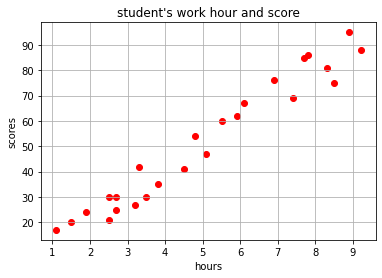

In [6]:
plt.scatter("Hours", "Scores", data = df, color = "red")
plt.grid('True')
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("student's work hour and score")
plt.show()

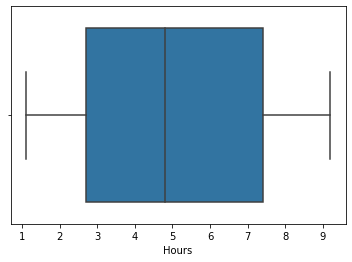

In [7]:
sns.boxplot(df['Hours'])

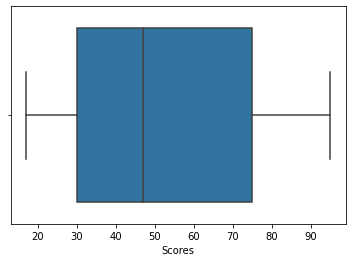

In [8]:
sns.boxplot(df['Scores'])

##  split dependent and undependent variable in X and Y

In [9]:
X =df.iloc[:,:-1].values  
y =df.iloc[:,1].values 

### put some data in X_train X_test and y_train y_test 

In [10]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## implement algorithm train the model

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

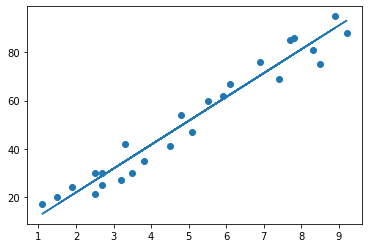

In [12]:
fitline=regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X,fitline);
plt.show()

###  predication

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

###  predicting new value

In [21]:
hours=[[9.25]]
own_pred = regressor.predict(hours)
a=pd.DataFrame({"No of Hours":hours,"Predicted Score":own_pred})
a

,No of Hours,Predicted Score
0,[9.25],93.691732


###  evaluation metrics

In [22]:
from sklearn import metrics
print('mean absolute error= ',metrics.mean_absolute_error(y_test,y_pred))

mean absolute error=  4.183859899002975


In [23]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))


21.5987693072174
4.6474476121003665


In [24]:
a=metrics.r2_score(y_test,y_pred)
print('accuracy of model is',a)

accuracy of model is 0.9454906892105356
